In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
plt.rcParams['figure.figsize']=(20.0,10.0)

In [4]:
data = pd.read_csv('headbrain.csv')    #read data
data.shape

(237, 4)

In [5]:
data

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


In [6]:
# collect X and Y
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [7]:
# means
meanX = np.mean(X)
meanY = np.mean(Y)

In [8]:
n = len(X)   # total number of values

In [9]:
# calculate the slope and the interception of Y axis
numerator=0
denominator=0
for i in range(n):
    numerator+=(X[i]-meanX)*(Y[i]-meanY)
    denominator+=(X[i]-meanX)**2
k=numerator/denominator
b=meanY-k*meanX

In [10]:
print(k,b)

0.26342933948939945 325.57342104944223


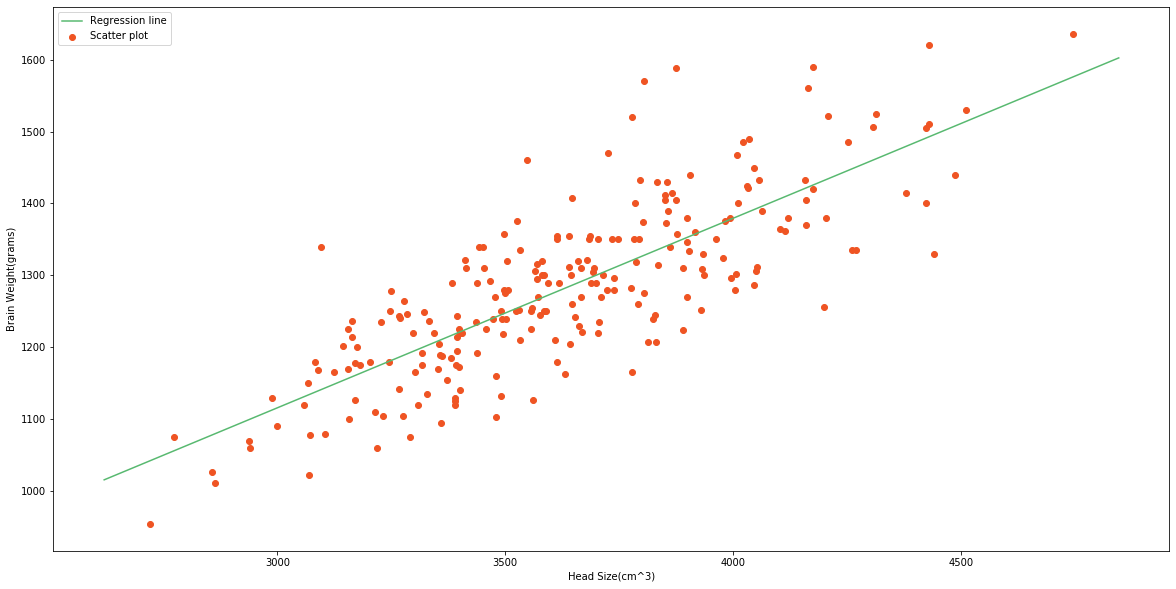

In [11]:
# plot 
maxX=np.max(X)+100
minX=np.min(X)-100
x=np.linspace(minX,maxX,1000)
y=k*x+b
plt.plot(x,y,color='#58b970', label='Regression line')
plt.scatter(X,Y,color='#ef5423', label='Scatter plot')
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.legend()
plt.show()

In [12]:
# evaluate by R-square
SST=0
SSR=0
for i in range(n):
    yPredict=X[i]*k+b
    SST+=(Y[i]-meanY)**2
    SSR+=(Y[i]-yPredict)**2
R2=1-SSR/SST
R2

0.6393117199570003

In [13]:
!pip install sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [21]:
# calculate R2 in sklearn
X=X.reshape((n,1))
Y=Y.reshape((n,1))
reg = LinearRegression()
reg=reg.fit(X,Y)
yPredict=reg.predict(X)
R2_sklearn=reg.score(X,Y)
R2_sklearn

0.639311719957